# ODEs
In ODEs we try to find a function $y$, givin its rate of change in time $dy/dt$. 

To discover an ODE (i.e. the rate of change in time for some phenomena):
1. Observe a pattern in how a phenomenon changes over time.
2. Formulate a hypothesis about the relationship between the quantity and its rate of change.
3. Derive the proportionality constant.
4. Test the hypothesis by comparing the solution to real-world data.
5. Generalize the findings to similar phenomena.

## Why ODE is Important
Predictive Power:
 + The model allows us to predict the amount of a substance remaining at any future time.

General Applicability:
  + This equation applies not only to radioactive decay but also to other processes like:
    - Population decline.
    - Cooling of objects (Newton’s Law of Cooling).
    - Discharge of a capacitor in an electrical circuit.
    - Foundation for Other Discoveries:
    - Understanding this ODE lays the foundation for discovering other, more complex differential equations in various fields.

# But what is typically given (form the professor or a skilled mined)
In an ODE problem, you typically have:
- The ODE itself (equation)
- Independent and dependent variables
- Initial or boundary conditions
- Order and nature (linearity) of the equation
- A solution approach (analytical or numerical) -> how to find the function

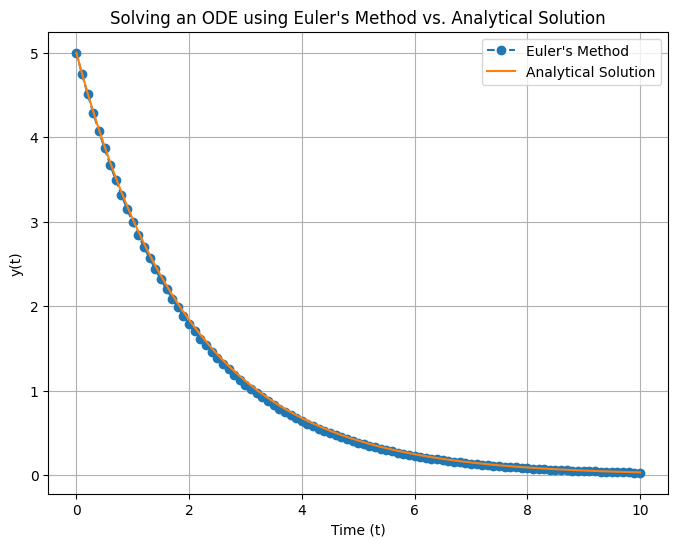

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ODE parameters
k = -0.5   # Decay rate
y0 = 5    # Initial value of y
t0 = 0     # Initial time
t_end = 10 # End time
h = 0.1    # Step size

# Define the function representing the ODE
def f(t, y):
    return k * y

# Analytical solution function
def analytical_solution(t):
    return y0 * np.exp(k * t)

# Initialize the arrays for Euler's method
t_values = np.arange(t0, t_end + h, h)
y_values = np.zeros(len(t_values))
y_values[0] = y0

# Apply Euler's Method
for i in range(1, len(t_values)):
    t = t_values[i - 1]
    y = y_values[i - 1]
    y_values[i] = y + h * f(t, y)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(t_values, y_values, label="Euler's Method", marker='o', linestyle='--')
plt.plot(t_values, analytical_solution(t_values), label="Analytical Solution", linestyle='-')
plt.xlabel("Time (t)")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.title("Solving an ODE using Euler's Method vs. Analytical Solution")
plt.show()


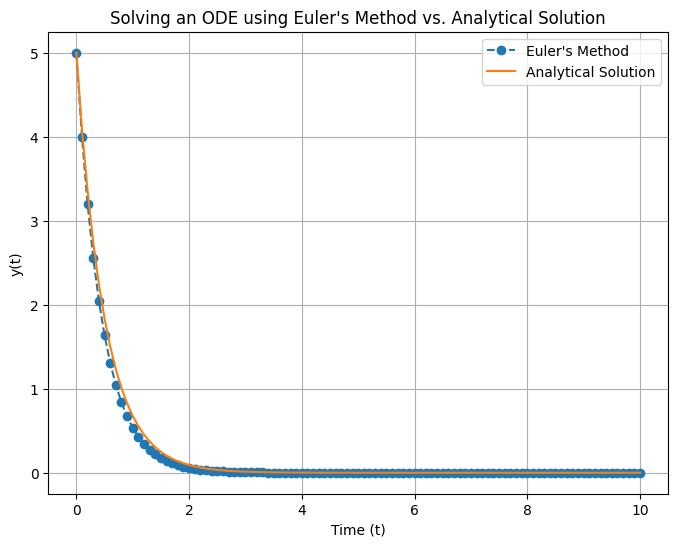

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
k = -2  # Decay constant
y0 = 5  # Initial value
t0 = 0  # Start time
t_end = 10  # End time
h = 0.1  # Time step

# Define the ODE function
def f(t, y):
    return k * y

# Analytical solution function
def analytical_solution(t):
    return y0 * np.exp(k * t)

# Initialize the arrays for Euler's method
t_values = np.arange(t0, t_end + h, h)
y_values = np.zeros(len(t_values))
y_values[0] = y0

# Apply Euler's method
for i in range(1, len(t_values)):
    t = t_values[i - 1]
    y = y_values[i - 1]
    y_values[i] = y + h * f(t, y)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(t_values, y_values, label="Euler's Method", marker='o', linestyle='--')
plt.plot(t_values, analytical_solution(t_values), label="Analytical Solution", linestyle='-')
plt.xlabel("Time (t)")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.title("Solving an ODE using Euler's Method vs. Analytical Solution")
plt.show()


# How to find the constants?

1. Collect Data: Obtain empirical data for the phenomenon.
2. Linearize the Equation: Convert the ODE solution to a linear form.
3. Fit a Line: Perform linear regression to find the proportionality constant.
4. Check Fit: Substitute the constant back into the equation and validate against the original data.

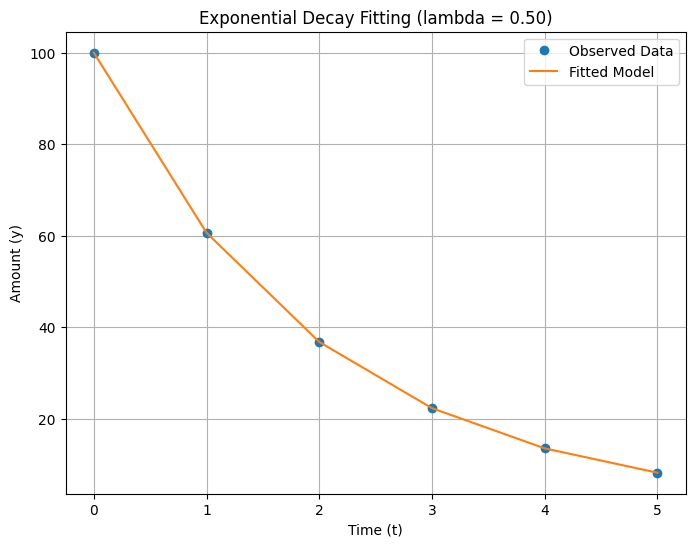

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Sample data
time_data = np.array([0, 1, 2, 3, 4, 5])
amount_data = np.array([100, 60.65, 36.79, 22.31, 13.53, 8.21])

# Linearize the data
log_amount_data = np.log(amount_data)

# Perform linear regression to find the decay constant
slope, intercept, r_value, p_value, std_err = linregress(time_data, log_amount_data)
lambda_decay = -slope

# Analytical solution function
def decay_model(t, y0, lambda_decay):
    return y0 * np.exp(-lambda_decay * t)

# Predict using the derived decay constant
predicted_data = decay_model(time_data, np.exp(intercept), lambda_decay)

# Plot original data and fitted model
plt.figure(figsize=(8, 6))
plt.plot(time_data, amount_data, 'o', label="Observed Data")
plt.plot(time_data, predicted_data, label="Fitted Model")
plt.xlabel("Time (t)")
plt.ylabel("Amount (y)")
plt.legend()
plt.grid(True)
plt.title(f"Exponential Decay Fitting (lambda = {lambda_decay:.2f})")
plt.show()


# Using Neural networks to solve ODEs

Epoch 0, Loss: 0.14926576614379883
Epoch 100, Loss: 0.00029371381970122457
Epoch 200, Loss: 8.00740162958391e-05
Epoch 300, Loss: 3.523309430875088e-07
Epoch 400, Loss: 1.1017267809165787e-07
Epoch 500, Loss: 4.946011955553331e-08
Epoch 600, Loss: 1.9936065243086887e-08
Epoch 700, Loss: 7.219134179337061e-09
Epoch 800, Loss: 2.3444781671599912e-09
Epoch 900, Loss: 6.809356412063039e-10


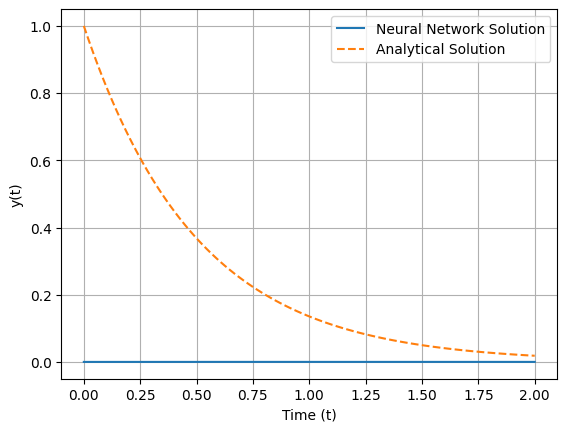

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the Neural Network Model
class ODEModel(nn.Module):
    def __init__(self):
        super(ODEModel, self).__init__()
        self.hidden = nn.Linear(1, 10)
        self.output = nn.Linear(10, 1)

    def forward(self, t):
        t = torch.relu(self.hidden(t))
        return self.output(t)

# Define the ODE Loss Function
def ode_loss(t, model):
    y_hat = model(t)
    dy_hat_dt = torch.autograd.grad(y_hat, t, grad_outputs=torch.ones_like(y_hat), create_graph=True)[0]
    # Residual of the ODE dy/dt + 2*y = 0
    ode_residual = dy_hat_dt + 2 * y_hat
    return torch.mean(ode_residual**2)

# Training the Model
model = ODEModel()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Generate Time Points
t_train = torch.linspace(0, 2, 100).view(-1, 1)
t_train.requires_grad = True

# Training Loop
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    loss = ode_loss(t_train, model)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Generate Test Data for Plotting
t_test = torch.linspace(0, 2, 100).view(-1, 1)
y_test = model(t_test).detach().numpy()

# Analytical Solution
y_analytical = np.exp(-2 * t_test.numpy())

# Plot the Neural Network Solution vs Analytical Solution
plt.plot(t_test.numpy(), y_test, label="Neural Network Solution")
plt.plot(t_test.numpy(), y_analytical, label="Analytical Solution", linestyle='--')
plt.xlabel("Time (t)")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.show()


Neural networks can help solve ODEs in the following ways:

1. Direct Function Approximation: Using a neural network to approximate the ODE solution directly.
2. Physics-Informed Neural Networks (PINNs): Incorporating the ODE as a constraint in the loss function.
3. Neural ODEs: Representing continuous transformations with a neural network inside an ODE solver.